In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


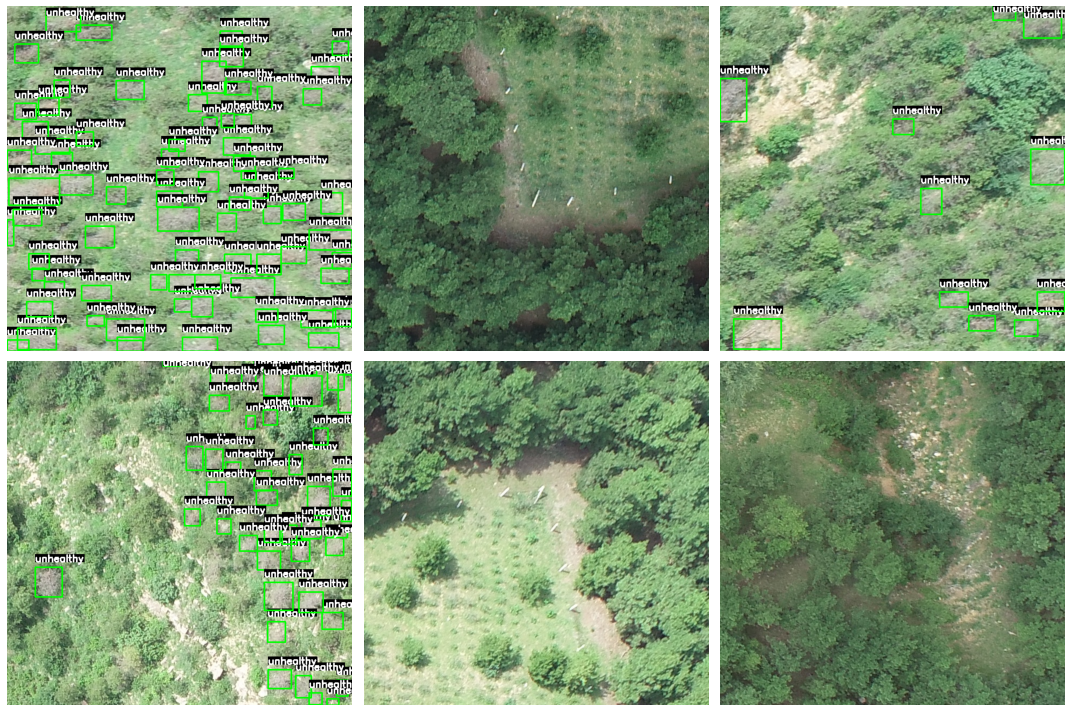

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/images"
labels_folder = "/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11m.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=50, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11m', name='Medium_try',
            batch=32, device=device, seed=69)

New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=data.yaml , epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11m, name=Medium_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/train/labels.cache... 4536 images, 1330 backgrounds, 0 corrupt: 100%|██████████| 4536/4536 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/val/labels.cache... 567 images, 168 backgrounds, 0 corrupt: 100%|██████████| 567/567 [00:00<?, ?it/s]


Plotting labels to YOLO11m/Medium_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO11m/Medium_try
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      17.8G      1.542      1.235      1.193        640        640: 100%|██████████| 142/142 [00:53<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all        567      12655      0.797      0.742      0.839      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      21.3G       1.28     0.8585      1.055        451        640: 100%|██████████| 142/142 [00:50<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        567      12655      0.816      0.815      0.885      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      19.9G      1.267     0.8359      1.054        502        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        567      12655      0.786      0.791      0.859      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      19.8G       1.25     0.8157      1.049        516        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        567      12655      0.821      0.809      0.885      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      20.5G      1.232     0.7824      1.042        494        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        567      12655      0.855      0.825      0.909      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      20.1G      1.205     0.7649      1.034        351        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        567      12655      0.815      0.839      0.897       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      20.3G      1.202     0.7426       1.03        762        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all        567      12655      0.832      0.816      0.897      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      20.1G      1.188      0.729      1.022        514        640: 100%|██████████| 142/142 [00:49<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        567      12655      0.815      0.827      0.894      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      20.1G      1.178     0.7278       1.02        394        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        567      12655      0.849      0.838      0.913       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      18.7G      1.167     0.7146      1.018        394        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all        567      12655      0.813      0.848      0.904      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      21.4G      1.169     0.7101      1.017        671        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        567      12655      0.824      0.822      0.898      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      19.7G      1.157     0.6898      1.015        565        640: 100%|██████████| 142/142 [00:49<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        567      12655      0.851      0.817      0.902      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      18.7G      1.148     0.6917      1.011        752        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.61it/s]

                   all        567      12655      0.779      0.822      0.875      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      20.2G      1.142     0.6773      1.011        789        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        567      12655      0.839      0.858      0.917      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      17.8G      1.134      0.676      1.009        635        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        567      12655      0.855      0.853      0.923      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      17.6G      1.133     0.6657      1.004        705        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        567      12655      0.834      0.859      0.916       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      19.3G       1.13     0.6619      1.003       1060        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        567      12655      0.854      0.853      0.923      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      20.6G      1.117     0.6547      1.002        525        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        567      12655      0.861      0.839      0.918      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      19.5G      1.119     0.6433      1.003        608        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        567      12655      0.881      0.843      0.927      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      18.7G      1.122      0.644          1        701        640: 100%|██████████| 142/142 [00:49<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        567      12655      0.837      0.848      0.912      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      19.3G      1.112     0.6431      1.003        668        640: 100%|██████████| 142/142 [00:49<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        567      12655      0.826      0.863      0.916      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      19.8G      1.107     0.6379      1.001        424        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        567      12655      0.871      0.859      0.932      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      20.5G      1.102     0.6266     0.9999        790        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        567      12655      0.869      0.856       0.93      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      18.4G      1.101     0.6281     0.9983        499        640: 100%|██████████| 142/142 [00:48<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        567      12655      0.846      0.864      0.924      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      18.4G       1.09     0.6172     0.9924        842        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        567      12655      0.874      0.844      0.927      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      18.4G       1.09      0.616     0.9926        892        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        567      12655      0.866      0.863      0.929      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      20.1G      1.089     0.6158     0.9923        593        640: 100%|██████████| 142/142 [00:49<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        567      12655      0.838      0.873      0.926      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      19.2G      1.086     0.6115     0.9954        486        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        567      12655      0.869      0.872      0.934      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        19G      1.075     0.6012     0.9848        408        640: 100%|██████████| 142/142 [00:49<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        567      12655      0.844       0.87      0.928      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      21.2G      1.069     0.6003      0.989        604        640: 100%|██████████| 142/142 [00:48<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        567      12655      0.875       0.87      0.935       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      18.8G      1.065     0.5918     0.9856        511        640: 100%|██████████| 142/142 [00:49<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        567      12655      0.863      0.866      0.932      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      20.9G      1.066     0.5944     0.9899        727        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]

                   all        567      12655      0.867      0.868      0.934      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      20.9G      1.059     0.5874     0.9817        774        640: 100%|██████████| 142/142 [00:48<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        567      12655      0.866      0.872      0.936      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      18.5G       1.05     0.5807       0.98        440        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        567      12655      0.838      0.869      0.923      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      20.5G      1.048      0.575     0.9799        625        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        567      12655      0.867      0.868      0.932       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      19.6G      1.049     0.5773     0.9809        511        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        567      12655      0.852      0.868       0.93       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      21.1G      1.045     0.5722     0.9775        784        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        567      12655      0.868      0.872      0.936      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      20.6G      1.042     0.5715     0.9777        610        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        567      12655      0.847      0.876      0.931      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      17.9G      1.033      0.562     0.9732        720        640: 100%|██████████| 142/142 [00:49<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        567      12655      0.876      0.879       0.94      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      19.4G      1.035     0.5602     0.9745        553        640: 100%|██████████| 142/142 [00:48<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        567      12655      0.878      0.872      0.937      0.667


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      17.6G      1.037     0.5635     0.9993        444        640: 100%|██████████| 142/142 [00:48<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        567      12655      0.873      0.873      0.934      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      17.7G      1.022     0.5552     0.9941        213        640: 100%|██████████| 142/142 [00:48<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        567      12655       0.88      0.871      0.939      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      17.3G      1.019     0.5461     0.9963        264        640: 100%|██████████| 142/142 [00:48<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        567      12655       0.87      0.879      0.937       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      17.8G      1.008      0.539     0.9906        388        640: 100%|██████████| 142/142 [00:48<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        567      12655       0.87      0.874      0.936      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      17.6G      1.007     0.5369     0.9891        368        640: 100%|██████████| 142/142 [00:48<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        567      12655      0.865      0.878      0.935      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      17.8G     0.9995      0.529     0.9853        352        640: 100%|██████████| 142/142 [00:48<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        567      12655      0.862      0.883      0.935      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      17.4G     0.9922     0.5203     0.9819        272        640: 100%|██████████| 142/142 [00:48<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        567      12655      0.873       0.88      0.938      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      17.5G     0.9991     0.5207     0.9888        343        640: 100%|██████████| 142/142 [00:48<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        567      12655      0.865      0.882      0.937      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      17.6G     0.9815     0.5121     0.9808        156        640: 100%|██████████| 142/142 [00:48<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        567      12655      0.866      0.883      0.938      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      17.6G     0.9778     0.5082     0.9787        431        640: 100%|██████████| 142/142 [00:48<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        567      12655      0.876       0.88      0.939      0.676



50 epochs completed in 0.749 hours.
Optimizer stripped from YOLO11m/Medium_try/weights/last.pt, 40.5MB
Optimizer stripped from YOLO11m/Medium_try/weights/best.pt, 40.5MB

Validating YOLO11m/Medium_try/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.09s/it]


                   all        567      12655      0.866      0.884      0.938      0.676
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to YOLO11m/Medium_try


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f40746bb400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
df = pd.read_csv('YOLO11m/Medium_try/results.csv')

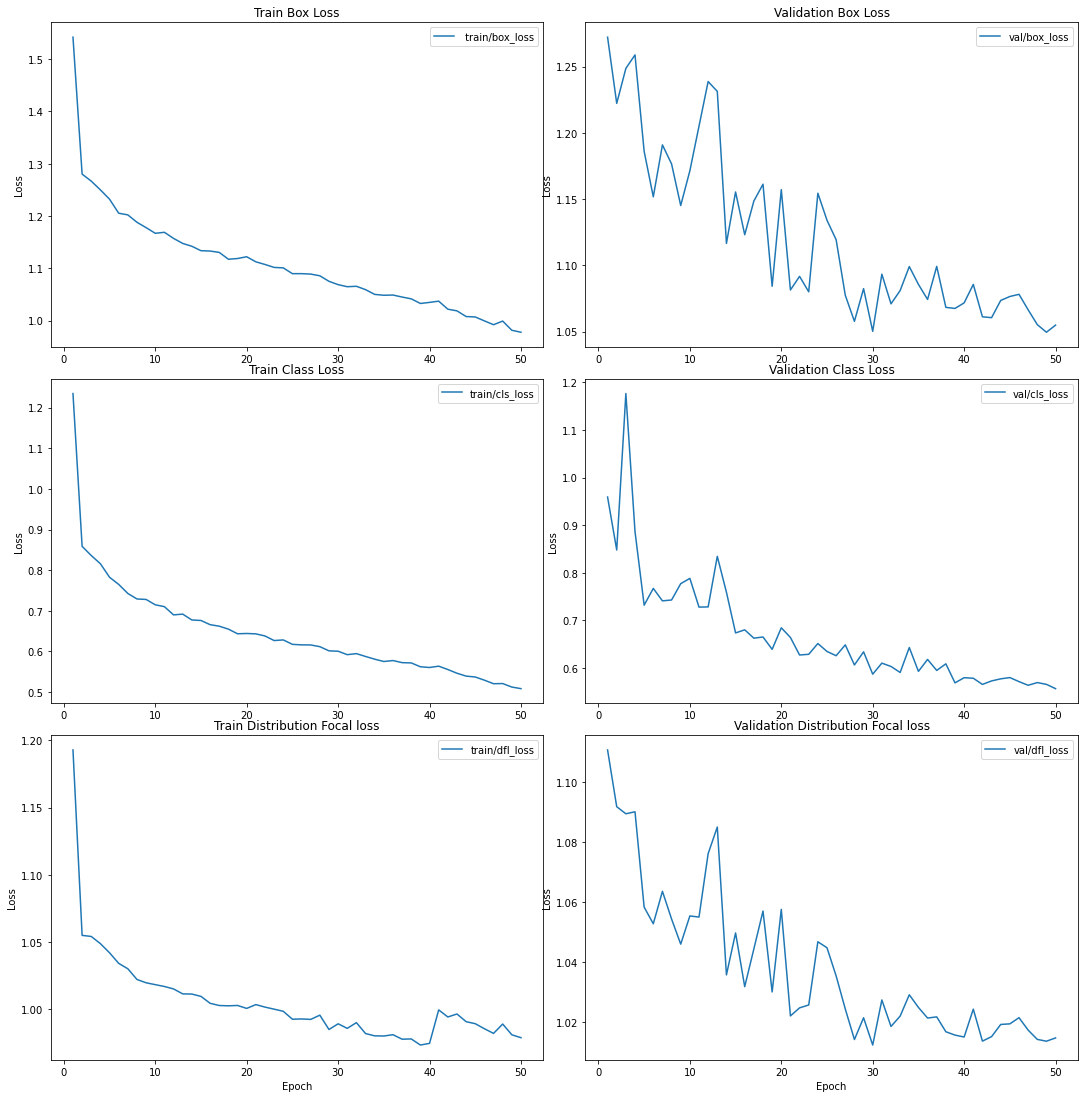

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

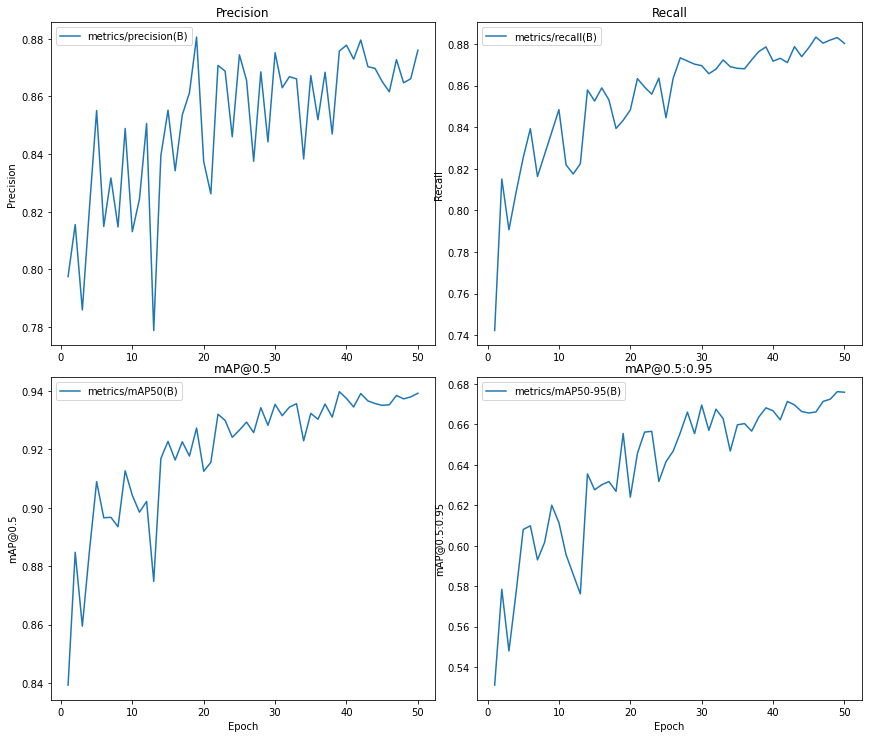

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

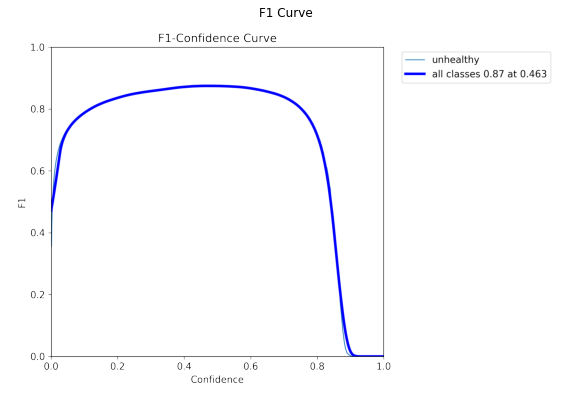

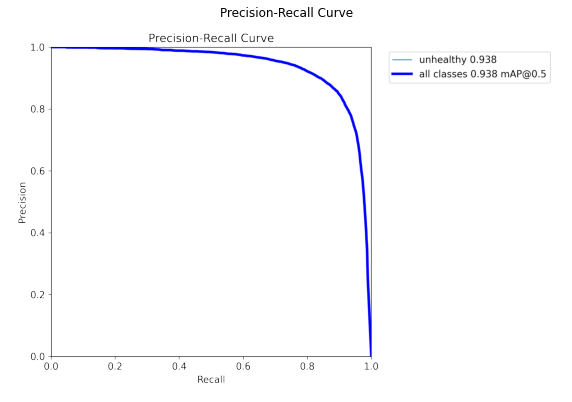

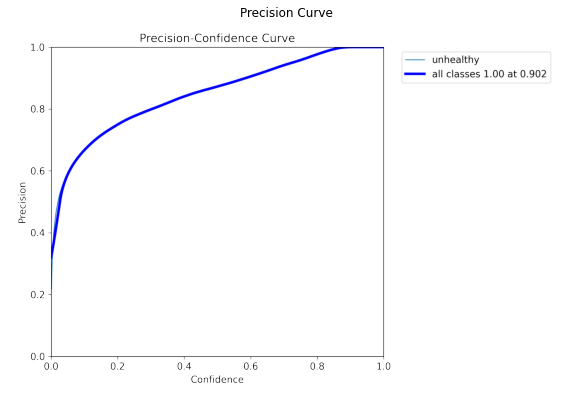

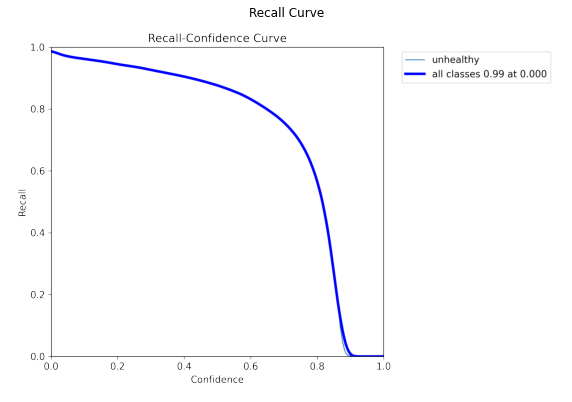

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO11m/Medium_try/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO11m/Medium_try/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO11m/Medium_try/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO11m/Medium_try/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

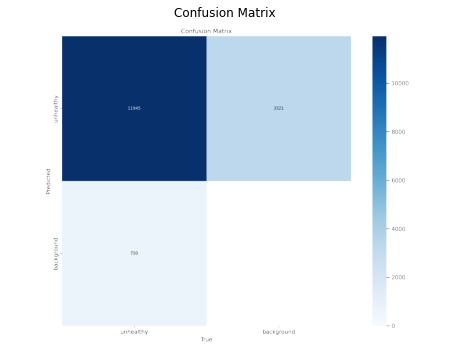

In [10]:
confusion_matrix = Image.open("YOLO11m/Medium_try/confusion_matrix.png")
plt.figure(figsize=(12, 6))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg: 640x640 71 unhealthys, 12.1ms
Speed: 1.1ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


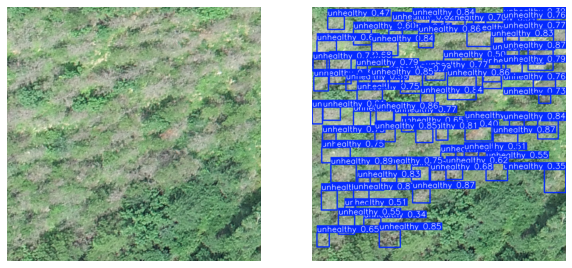

In [11]:
res = model('/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('/home/user/CourseWork/datasets/Pests_and_Diseases_Tree/PDT dataset/PDT dataset/LL/YOLO_txt/test/images/images_(35)_0004.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();